<a href="https://colab.research.google.com/github/surbhigari/House-Price-Predictions-/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/KanchanMaan/house_price_prediction/refs/heads/main/housing%20data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.shape

(21613, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
data.columns.tolist()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [8]:
data.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [9]:
data.nunique()

,0
id,21436
date,372
price,3625
bedrooms,13
bathrooms,30
sqft_living,1038
sqft_lot,9782
floors,6
waterfront,2
view,5


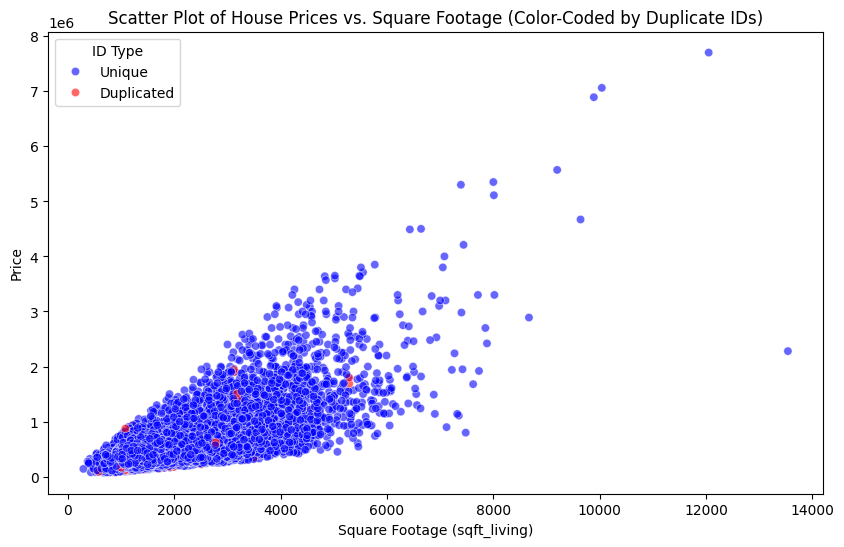

In [10]:

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'].str[:8], format='%Y%m%d')

# Identify duplicated 'id's
duplicate_ids = data[data.duplicated(subset='id', keep=False)]['id'].unique()

# Create a new column to distinguish between duplicated and unique ids
data['id_color'] = data['id'].apply(lambda x: 'Duplicated' if x in duplicate_ids else 'Unique')

# Create the scatter plot with different colors for duplicated ids
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='sqft_living',
    y='price',
    hue='id_color',
    palette={'Duplicated': 'red', 'Unique': 'blue'},
    alpha=0.6
)

plt.title('Scatter Plot of House Prices vs. Square Footage (Color-Coded by Duplicate IDs)')
plt.xlabel('Square Footage (sqft_living)')
plt.ylabel('Price')
plt.legend(title='ID Type')
plt.show()


Red dots are duplicated ids it may indicates multiple sales records of the same property of over time.

In [11]:
# Filter the data to extract rows with duplicated ids, including the 'date' column
duplicate_ids_data_with_date = data[data['id'].isin(duplicate_ids)][['id', 'date', 'price', 'sqft_living']]

# Replace 'other_columns' with the specific column names you want to include, or use data.columns to include all columns

# Display the duplicate ids with the 'date' column and other relevant columns
duplicate_ids_data_with_date


,id,date,price,sqft_living
93,6021501535,2014-07-25,430000.0,1580
94,6021501535,2014-12-23,700000.0,1580
313,4139480200,2014-06-18,1380000.0,4290
314,4139480200,2014-12-09,1400000.0,4290
324,7520000520,2014-09-05,232000.0,1240
...,...,...,...,...
20670,8564860270,2015-03-30,502000.0,2680
20779,6300000226,2014-06-26,240000.0,1200
20780,6300000226,2015-05-04,380000.0,1200
21580,7853420110,2014-10-03,594866.0,2780


<Axes: >

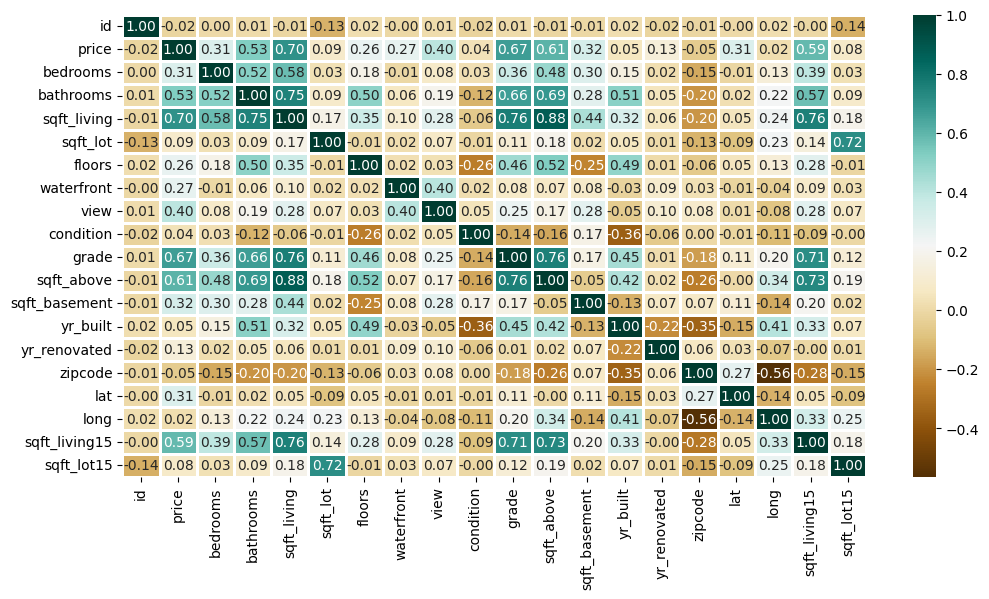

In [12]:
numerical_data = data.select_dtypes(include =['number'])

plt.figure(figsize =(12,6))
sns.heatmap(numerical_data.corr(),
            cmap= 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/mnt/data/kc_house_data.csv')

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'].str[:8], format='%Y%m%d')

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Handle missing values (if any)
# For simplicity, we will drop rows with missing values.
# You could also impute missing values based on the context.
data.dropna(inplace=True)

# Create new feature: House Age
data['house_age'] = data['date'].dt.year - data['yr_built']

# Drop columns that are not needed or redundant
data.drop(['id', 'date', 'yr_built', 'yr_renovated', 'lat', 'long'], axis=1, inplace=True)

# One-hot encode categorical variables (e.g., 'zipcode')
data = pd.get_dummies(data, columns=['zipcode'], drop_first=True)

# Feature matrix (X) and target variable (y)
X = data.drop('price', axis=1)  # Features
y = data['price']                 # Target variable

# Display the first few rows of the processed dataset
print("Processed DataFrame:")
print(data.head())


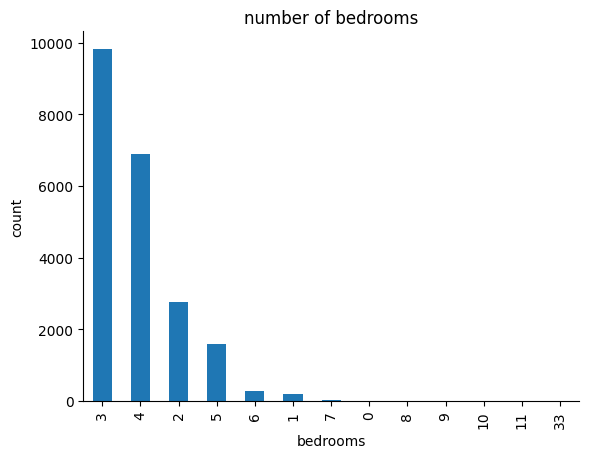

In [13]:
data['bedrooms'].value_counts().plot(kind ='bar')
plt.title('number of bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('count')
sns.despine()

As we can see from the visualization 3 bedroom houses are most commonly sold followed by 4 bedroom. So how is it useful ? For a builder having this data , He can make a new building with more 3 and 4 bedroom’s to attract more buyers.

<Figure size 1000x1000 with 0 Axes>

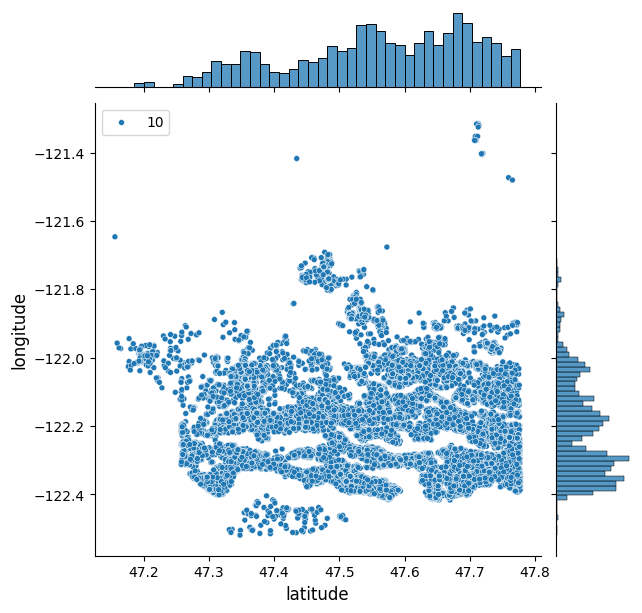

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize = (10,10))
sns.jointplot(x = data.lat.values, y = data.long.values,size = 10)
plt.ylabel('longitude',fontsize = 12)
plt.xlabel('latitude',fontsize = 12)
plt.show()
plt1 = plt.figure()
sns.despine()

For latitude between -47.7 and -48.8 there are many houses , which would mean that maybe it’s an ideal location isn’t it ? But when we talk about longitude we can see that concentration is high between -122.2 to -122.4. Which would mean that most of the buy’s has been for this particular location.

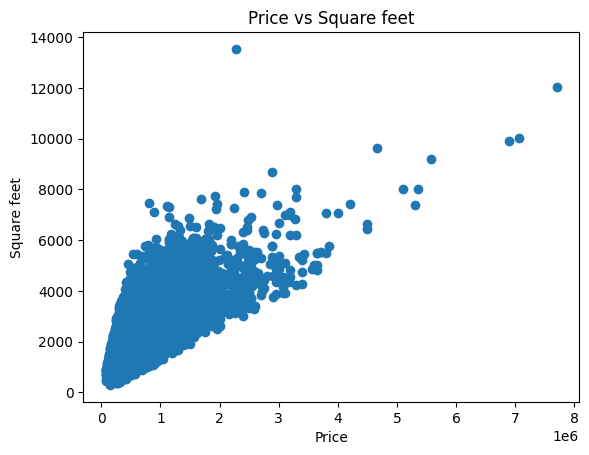

In [15]:
plt.scatter(data.price,data.sqft_living)
plt.title("Price vs Square feet")
plt.xlabel("Price")
plt.ylabel("Square feet")
plt.show()

 we can see that more the living area , more the price though data is concentrated towards a particular price zone , but from the figure we can see that the data points seem to be in linear direction. Thanks to scatter plot we can also see some irregularities that the house with the highest square feet was sold for very less , maybe there is another factor or probably the data must be wrong.

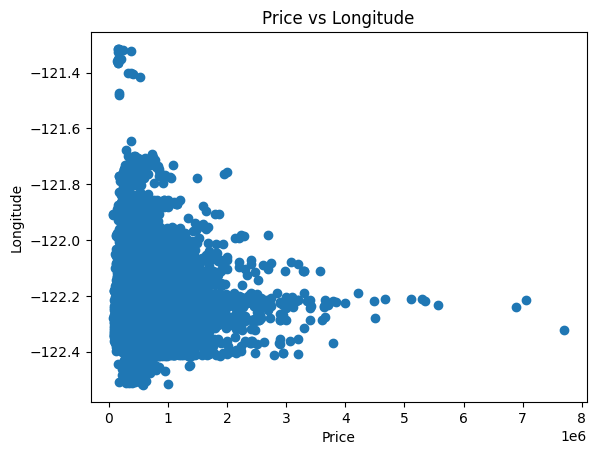

In [16]:
plt.scatter(data.price,data.long)
plt.title("Price vs Longitude")
plt.xlabel("Price")
plt.ylabel("Longitude")
plt.show()

figure tells us about the location of the houses in terms of longitude and it gives us quite an interesting observation that -122.2 to -122.4 sells houses at much higher amount.

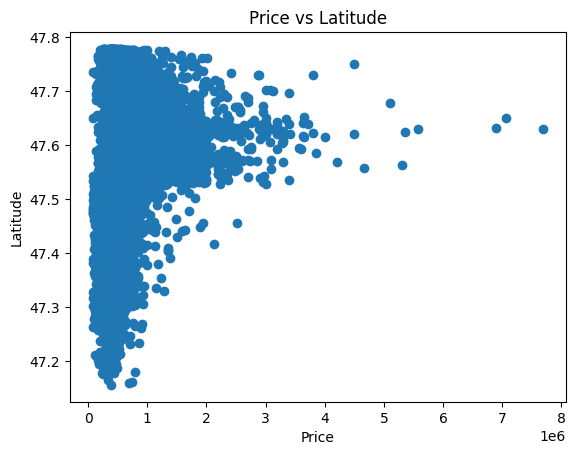

In [17]:
plt.scatter(data.price,data.lat)
plt.title("Price vs Latitude")
plt.xlabel("Price")
plt.ylabel("Latitude")
plt.show()

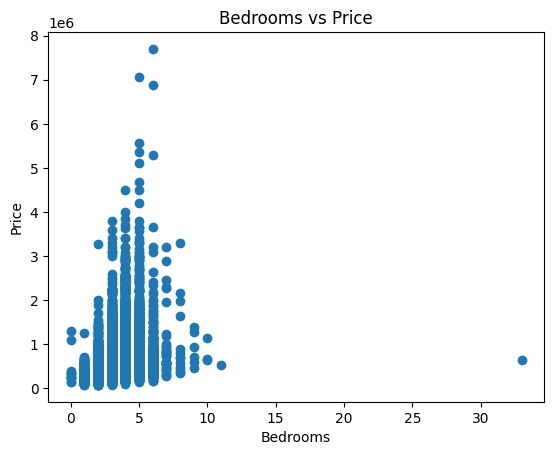

In [18]:
plt.scatter(data.bedrooms,data.price)
plt.title("Bedrooms vs Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

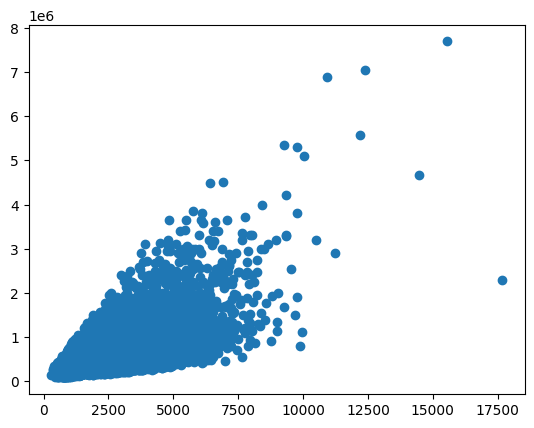

In [19]:
plt.scatter((data['sqft_living']+ data['sqft_basement']),data['price'])


Text(0, 0.5, 'Price')

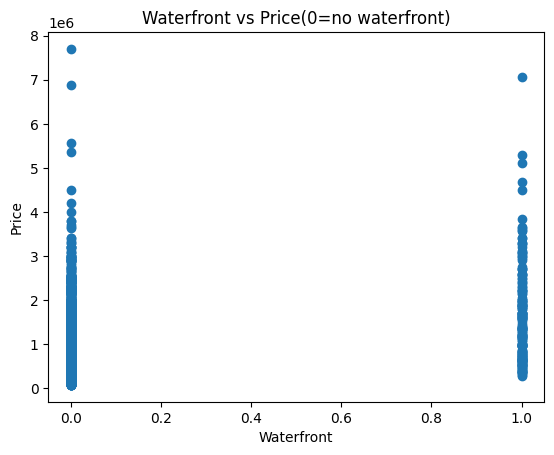

In [20]:
plt.scatter(data.waterfront,data.price)
plt.title("Waterfront vs Price(0=no waterfront)")
plt.xlabel("Waterfront")
plt.ylabel("Price")

price is independent of waterfront.

In [21]:
train1 = data.drop(['id','price'],axis = 1)

In [22]:
train1.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,id_color
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Unique
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Unique
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Unique
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Unique
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Unique


<Axes: xlabel='floors'>

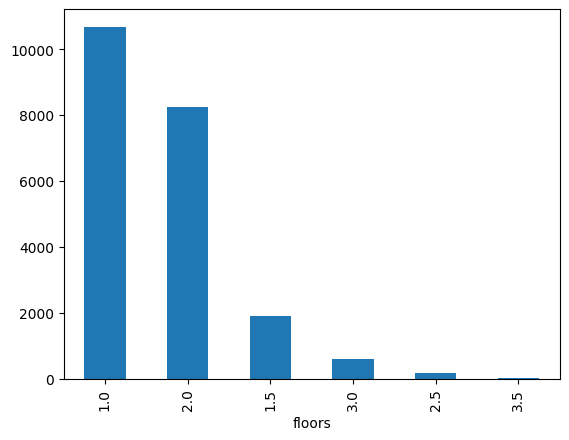

In [23]:
data.floors.value_counts().plot(kind='bar')

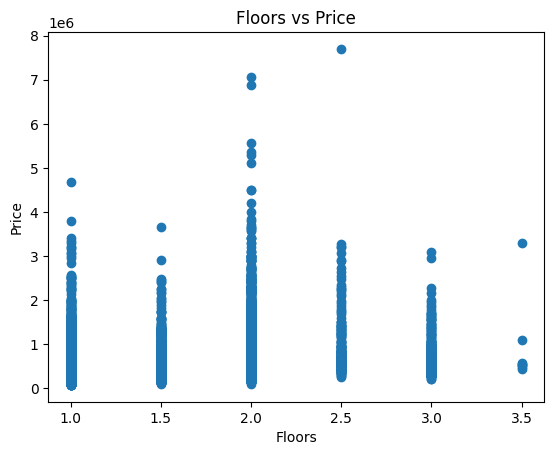

In [24]:
plt.scatter(data.floors,data.price)
plt.title("Floors vs Price")
plt.xlabel("Floors")
plt.ylabel("Price")
plt.show()


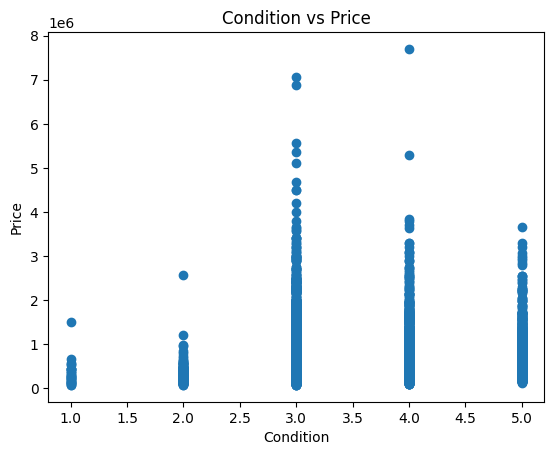

In [25]:
plt.scatter(data.condition,data.price)
plt.title("Condition vs Price")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.show()

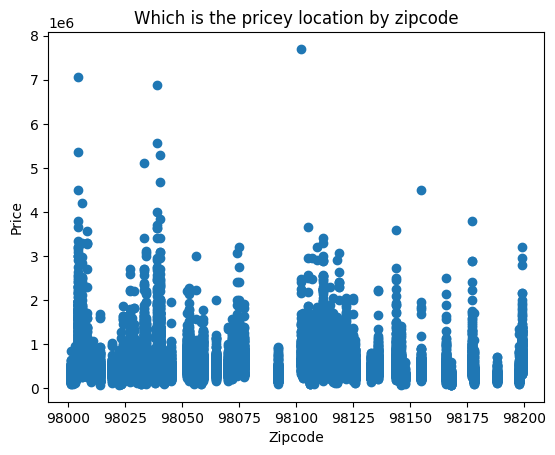

In [26]:
plt.scatter(data.zipcode,data.price)
plt.title("Which is the pricey location by zipcode")
plt.xlabel("Zipcode")
plt.ylabel("Price")
plt.show()


In [27]:
from sklearn.preprocessing import OneHotEncoder
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of categorical features:',len(object_cols))

Categorical variables:
['id_color']
No. of categorical features: 1


## Feature Engineering

In [28]:
# new feature: House Age
data['house_age'] = data['date'].dt.year - data['yr_built']

# Renovation age
data['renovation_age'] = 2024 - data['yr_renovated']

#one -hot encoder categorical variables(including zipcode)
data = pd.get_dummies(data, columns =['zipcode'],drop_first = True)

In [29]:
# Price per square foot
data['price_per_sqft'] = data['price'] / data['sqft_living']

# Bathrooms per bedroom
data['bathrooms_per_bedroom'] = data['bathrooms'] / data['bedrooms']


In [30]:
# Check the data type of the 'date' column
print(data['date'].dtype)
print(data['date'].head())  # Inspect the first few values


datetime64[ns]
0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]


In [31]:
# eextract features from datetime

data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day_of_week'] = data['date'].dt.dayofweek  # 0=Monday, 6=Sunday


In [32]:
# renovation indicator
data['renovated'] = (data['yr_renovated'] > 0).astype(int)


In [33]:
#

data['sqft_grade_interaction'] = data['sqft_living'] * data['grade']



#Splitting Dataset into Training and Testing

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [35]:
# Features
x = data.drop('price',axis = 1)

#Target Variable
y = data['price']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state =42)
#split the dataset into training and testing set( 80% train, 20% test)

In [37]:
x_train_numeric = x_train.select_dtypes(include = [np.number])
x_test_numeric = x_test.select_dtypes(include = [np.number])

In [38]:
x_train_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
x_test_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
x_train_numeric.fillna(x_train_numeric.mean(), inplace=True)  # Fill NaN values with column mean
x_test_numeric.fillna(x_test_numeric.mean(), inplace=True)

In [39]:
#Standardizing the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_numeric)
x_test_scaled = scaler.transform(x_test_numeric)

#Using Random Forest Regressor Model

In [40]:
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(x_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [41]:
#making predictions on the test set
y_pred = model.predict(x_test_scaled)
print(y_pred,len(y_pred))

[ 363982.9   867642.05 1044980.   ...  286096.54  605188.76  354434.4 ] 4323


In [42]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Mean Squared Error:{mse:.2f}")
print(f"R^2 Score:{r2:.2f}")


Mean Squared Error:751750506.82
R^2 Score:1.00


##Linear Regression Model

In [43]:
from sklearn.linear_model import LinearRegression


In [44]:
reg = LinearRegression()

In [45]:
labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date]
data['date'] = conv_dates
train = data.drop(['id','price'],axis = 1)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(train1,labels,test_size = 0.10)

In [48]:
reg.fit(x_train,y_train)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.ObjectDType'>)

In [ ]:
reg.score(x_test,y_test)

In [ ]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=0.1, loss='ls')
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

##Dimension Reduction and Visualization

In [50]:
# Select numeric columns for PCA and Chernoff Faces (excluding 'id' and 'date')
numeric_features = data.select_dtypes(include=['float64', 'int64']).drop(columns=['id'])

# Replace infinite values with NaN, then drop rows with NaN
numeric_features.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_features = numeric_features.dropna()

# Standardize the data
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)

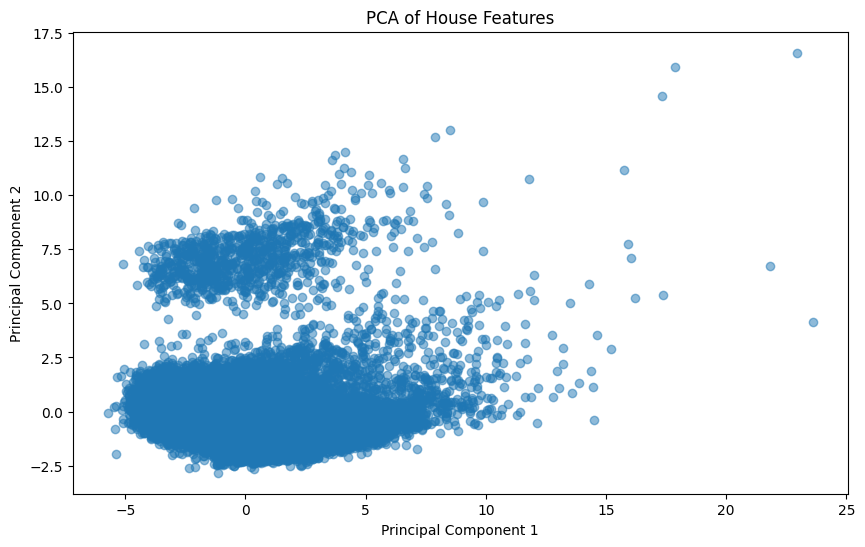

In [51]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_features_scaled)

# Plot PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA of House Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


#Similarity

In [52]:
from sklearn.metrics import pairwise_distances

# Calculate Euclidean distance matrix
distance_matrix = pairwise_distances(numeric_features_scaled, metric='euclidean')

# Convert to DataFrame using indices from numeric_features (after dropping NaNs)
distance_df = pd.DataFrame(distance_matrix, index=numeric_features.index, columns=numeric_features.index)

# Display a portion of the distance matrix
distance_df.head()


,0,1,2,3,4,5,6,7,8,9,...,21603,21604,21605,21606,21607,21608,21609,21610,21611,21612
0,0.000000,9.630597,3.349897,5.472525,3.624433,13.279634,4.330775,1.681648,2.102980,5.069891,...,5.716754,5.325250,5.722644,7.593291,4.949705,5.809610,4.965741,4.003524,4.696664,3.677242
1,9.630597,0.000000,9.839902,9.821566,9.410305,13.804976,9.535872,9.598923,9.532200,9.698639,...,9.702305,9.621986,9.681066,9.855742,9.497616,9.460334,9.423611,10.062075,9.450223,9.967859
2,3.349897,9.839902,0.000000,6.461618,4.651144,13.440652,5.693775,3.651141,3.852378,6.072698,...,6.525167,6.583641,7.050875,8.726214,6.080125,6.619101,6.660010,5.332619,5.964156,5.134390
3,5.472525,9.821566,6.461618,0.000000,5.122657,11.569355,5.403490,4.835155,5.077522,5.948450,...,6.408752,6.176477,6.037388,5.717687,4.883297,6.138463,5.392961,6.427922,5.435124,6.386980
4,3.624433,9.410305,4.651144,5.122657,0.000000,10.945263,4.045087,3.295207,4.228162,3.404542,...,2.987185,4.373431,3.608624,5.684186,3.716011,4.661921,3.898573,4.239906,2.503897,4.170784


#hierarchical clustering

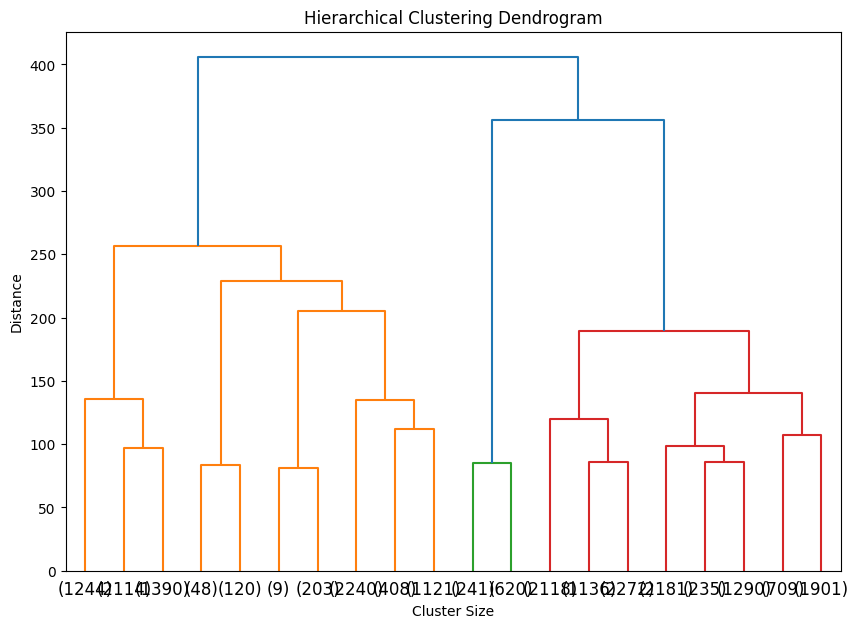

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler




# Perform hierarchical clustering
linked = linkage(numeric_features_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


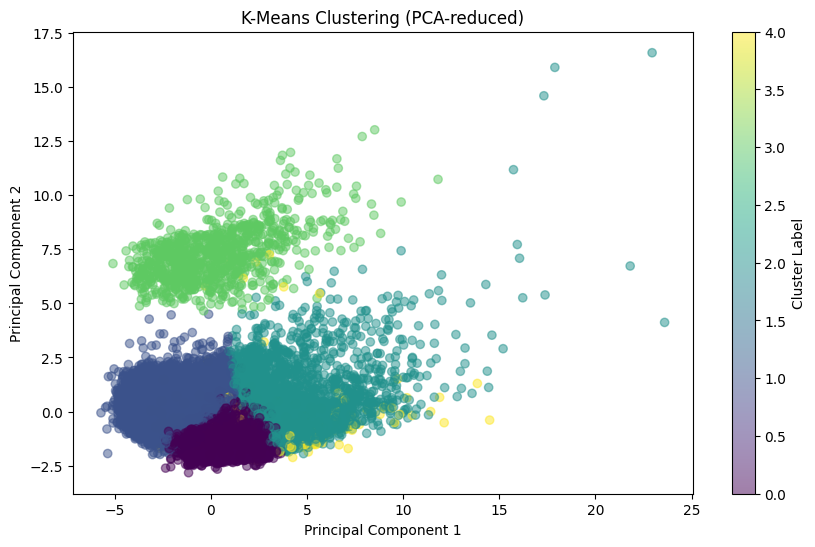

In [54]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(numeric_features_scaled)

# Add cluster labels to the original data
data['KMeans_Cluster'] = pd.Series(kmeans_labels, index=numeric_features.index)

# Plot clusters (PCA for dimensionality reduction)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(numeric_features_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

#

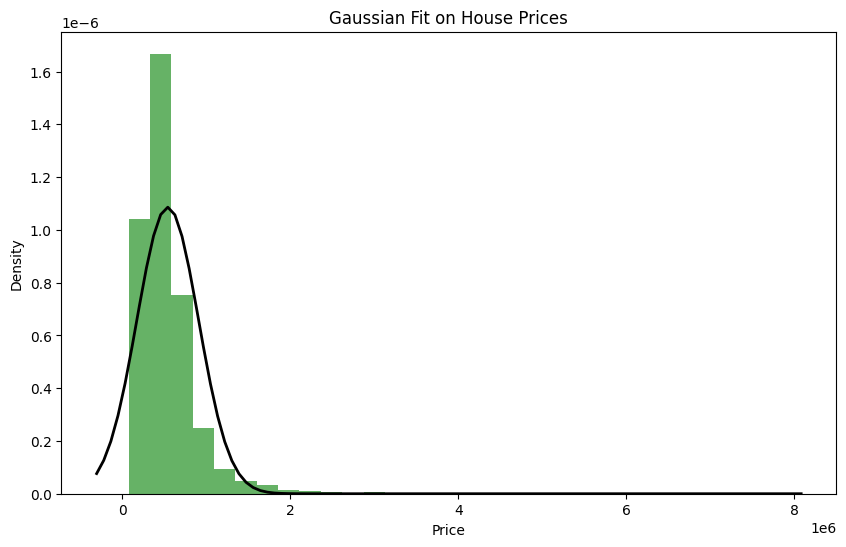

In [55]:
import scipy.stats as stats

# Choose a single feature (e.g., price)
price_data = data['price'].dropna()

# Fit a Gaussian distribution to the data
mu, std = stats.norm.fit(price_data)

# Plot the histogram and the PDF of the fitted distribution
plt.figure(figsize=(10, 6))
plt.hist(price_data, bins=30, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Gaussian Fit on House Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


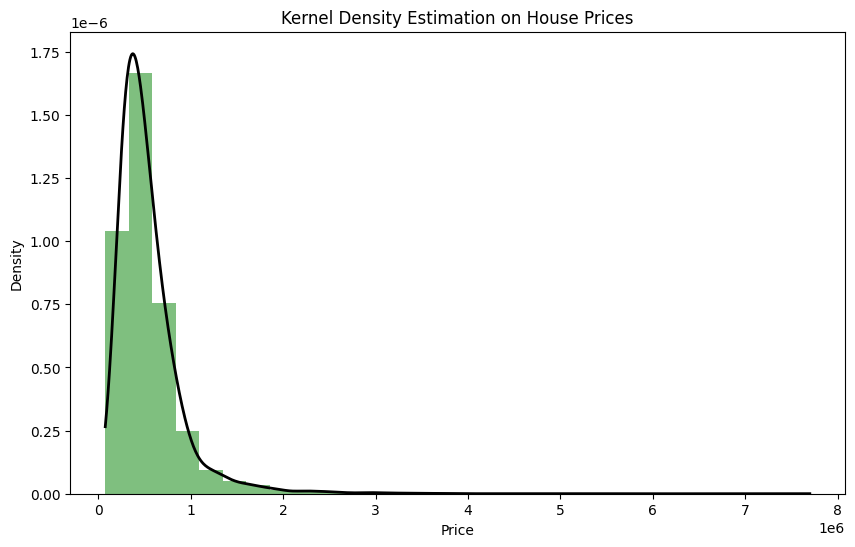

In [56]:
from sklearn.neighbors import KernelDensity
import numpy as np

# Reshape price data for KDE
price_data_reshaped = price_data.values.reshape(-1, 1)

# Apply KDE with Gaussian kernel
kde = KernelDensity(kernel='gaussian', bandwidth=1e5).fit(price_data_reshaped)
price_range = np.linspace(price_data.min(), price_data.max(), 1000).reshape(-1, 1)
log_density = kde.score_samples(price_range)

# Plot KDE
plt.figure(figsize=(10, 6))
plt.hist(price_data, bins=30, density=True, alpha=0.5, color='g')
plt.plot(price_range, np.exp(log_density), 'k', linewidth=2)
plt.title('Kernel Density Estimation on House Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


#Clustering Analysis (K-Means):

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


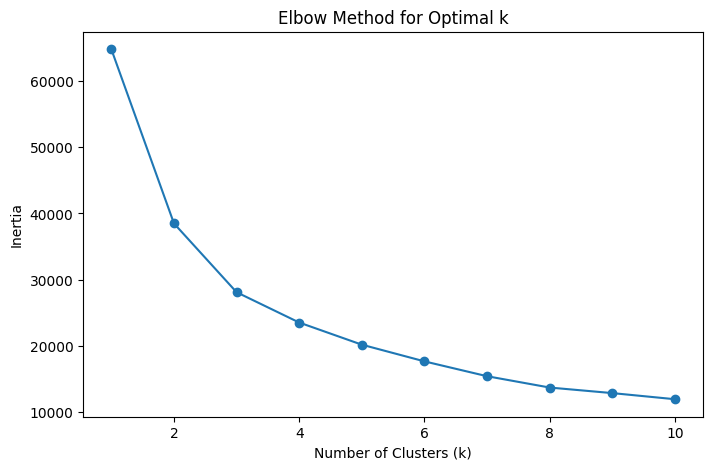

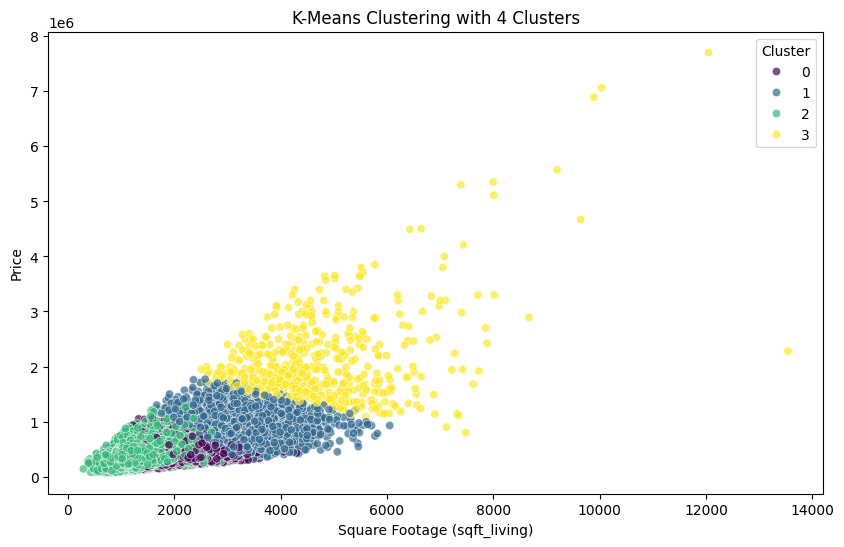

Cluster Centers:
   sqft_living         price  bedrooms
0  2163.322905  4.486624e+05  4.235821
1  3202.680051  8.604071e+05  3.928900
2  1536.426207  4.022328e+05  2.728325
3  4669.105903  2.027674e+06  4.381944


In [60]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Select relevant features for clustering
# We choose 'sqft_living', 'price', and 'bedrooms' as clustering attributes for simplicity
features = data[['sqft_living', 'price', 'bedrooms']]

# Step 1: Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 2: Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Step 3: Apply K-Means Clustering with an optimal k (choose k based on the elbow plot)
optimal_k = 4  # Example choice, adjust based on elbow plot results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='sqft_living',
    y='price',
    hue='Cluster',
    palette='viridis',
    alpha=0.7
)
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.xlabel('Square Footage (sqft_living)')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.show()

# Step 5: Analyze the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['sqft_living', 'price', 'bedrooms'])
print("Cluster Centers:")
print(cluster_centers_df)


#Association Rule Mining

In [61]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


# Step 1: Discretize continuous variables for Association Rule Mining
# Discretize 'price' and 'sqft_living' into bins
data['price_bin'] = pd.qcut(data['price'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
data['sqft_bin'] = pd.qcut(data['sqft_living'], q=4, labels=['Small', 'Medium', 'Large', 'Very Large'])

# Select categorical columns for association rule mining
# In this example, we use 'price_bin', 'sqft_bin', and 'bedrooms'
transactions = data[['price_bin', 'sqft_bin', 'bedrooms']].astype(str).values.tolist()

# Step 2: Encode data for the Apriori algorithm
te = TransactionEncoder()
te_data = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_data, columns=te.columns_)

# Step 3: Perform Apriori algorithm to find frequent itemsets
# Minimum support threshold is set at 0.05 (adjustable)
frequent_itemsets = apriori(transaction_df, min_support=0.05, use_colnames=True)

# Step 4: Generate association rules
# We set the confidence threshold to 0.6 (adjustable)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Sort the rules by lift to find the strongest associations
rules = rules.sort_values(by="lift", ascending=False)

# Display the top 10 rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


       antecedents   consequents   support  confidence      lift
4   (Very High, 4)  (Very Large)  0.089853    0.752422  3.034538
0              (2)       (Small)  0.094203    0.737681  2.950315
5  (Very Large, 4)   (Very High)  0.089853    0.665752  2.678003
1      (Very High)  (Very Large)  0.161199    0.648427  2.615126
2     (Very Large)   (Very High)  0.161199    0.650121  2.615126
3    (Low, Medium)           (3)  0.055106    0.675170  1.485388


 # Classification (If Creating Labels)

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Create target labels based on price ranges
# Using pd.qcut to create 3 price categories: 'Low', 'Medium', 'High'
data['price_category'] = pd.qcut(data['price'], q=3, labels=['Low', 'Medium', 'High'])

# Select relevant features and the target label
features = data[['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'grade']]
target = data['price_category']

# Step 2: Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3a: Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

# Step 3b: Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Step 3c: Train a Support Vector Machine (SVM) Classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Step 4: Evaluate the models
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix for each model
print("Confusion Matrix for Decision Tree:\n", confusion_matrix(y_test, y_pred_dt))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rf))
print("Confusion Matrix for SVM:\n", confusion_matrix(y_test, y_pred_svm))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Decision Tree Classification Report:
               precision    recall  f1-score   support

        High       0.65      0.65      0.65      1472
         Low       0.57      0.61      0.59      1447
      Medium       0.43      0.39      0.41      1404

    accuracy                           0.55      4323
   macro avg       0.55      0.55      0.55      4323
weighted avg       0.55      0.55      0.55      4323

Random Forest Classification Report:
               precision    recall  f1-score   support

        High       0.68      0.67      0.68      1472
         Low       0.58      0.60      0.59      1447
      Medium       0.43      0.42      0.43      1404

    accuracy                           0.57      4323
   macro avg       0.56      0.56      0.56      4323
weighted avg       0.57      0.57      0.57      4323

SVM Classification Report:
               precision    recall  f1-score   support

        High       0.74      0.71      0.73      1472
         Low       0.63  

#Surpervised learning

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler


# Select features and target variable
X = data[['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'grade']]
y = data['price']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for neural networks and boosting models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Helper function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} - MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"{model_name} - MSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"{model_name} - RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"{model_name} - R^2: {r2_score(y_true, y_pred):.2f}\n")

# Step 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Step 2: Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
evaluate_model(y_test, y_pred_dt, "Decision Tree")

# Step 3: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Step 4: Gradient Boosting (XGBoost)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_xgb, "XGBoost")

# Step 5: Neural Network Model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
y_pred_nn = nn_model.predict(X_test_scaled).flatten()
evaluate_model(y_test, y_pred_nn, "Neural Network")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Linear Regression - MAE: 165474.54
Linear Regression - MSE: 68020148999.85
Linear Regression - RMSE: 260806.73
Linear Regression - R^2: 0.55

Decision Tree - MAE: 193965.55
Decision Tree - MSE: 111222522686.04
Decision Tree - RMSE: 333500.41
Decision Tree - R^2: 0.27

Random Forest - MAE: 164626.79
Random Forest - MSE: 73230434735.37
Random Forest - RMSE: 270611.22
Random Forest - R^2: 0.52

XGBoost - MAE: 158030.92
XGBoost - MSE: 77801648561.04
XGBoost - RMSE: 278929.47
XGBoost - R^2: 0.49



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network - MAE: 159714.46
Neural Network - MSE: 62222470791.11
Neural Network - RMSE: 249444.32
Neural Network - R^2: 0.59

